In [27]:
import pandas as pd
import numpy as np
import random 
import matplotlib.pyplot as plt


Take a book leave a book neighbourhood lending library simulator
500 books  distributed between 1 tablibrary (20 books) and 10 users (48 books)
each book has a "true rating" and an indivdual user rating that is randomly +- 1.5 from the true rating
500x11 dataframe - book "title" is index. true and user ratings are columns
true ratings normally distributed around 6(?) with sd 1.5(?)

user object contains list of current books and list of past books
tablibrary contains list of books currently held in tablibrary
lending event: 
-random user selected
-random book is selected from user current books list with user rating < mean of current user books and is added to user past books list and tablibrary list. 
-random book NOT IN user past books list selected from tablibrary and added to user current books list

repeat lending events some number of times


Advanced:
run to user is not able to pull unread books from tablibrary 2 times
remove and introduce users randomly or by trigger



In [2]:
Does the user current book mean qrating increase over time?
Does the tablibrary true book rating decrease over time?


In [3]:
true_book_ratings= np.random.normal(6,1.5,500)

In [4]:
true_book_ratings.max()

10.209349617424266

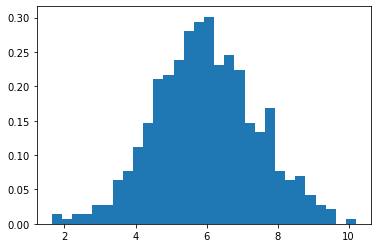

In [5]:
plt.hist(true_book_ratings, 30, density=True)
plt.show()

In [6]:
book_rating=pd.DataFrame(true_book_ratings,columns=['true_rating'],)

In [7]:
book_rating

,true_rating
0,7.385318
1,6.877611
2,5.421538
3,5.679951
4,8.712724
...,...
495,7.866049
496,4.982273
497,6.254777
498,5.267206


test user rating system where user randomly ratees the book higher or lower than the true rating

In [8]:
user_rating= []
for rat in true_book_ratings:
    user_rating.append(rat+np.random.uniform(-1.5,1.5))

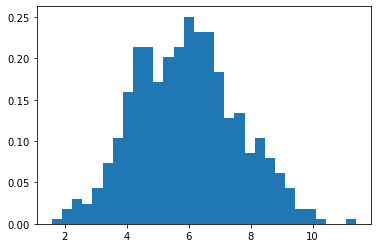

In [9]:
plt.hist(user_rating, 30, density=True)
plt.show()

create 10 user rating lists and add to book rating dataframe

In [10]:
for i in list(range(0,10)):
    user_rating= []
    for rat in true_book_ratings:
        user_rating.append(rat+np.random.uniform(-1.5,1.5))
    book_rating['user'+str(i)]=user_rating

In [11]:
book_rating

,true_rating,user0,user1,user2,user3,user4,user5,user6,user7,user8,user9
0,7.385318,6.394908,6.961987,8.080875,7.654219,8.306352,6.311606,8.437116,8.337015,8.124542,6.505795
1,6.877611,5.803325,5.715903,5.803238,7.593785,6.846741,7.219484,6.226665,5.751583,6.557442,5.419541
2,5.421538,4.681553,4.564249,4.521103,6.021312,5.806754,6.293812,4.405940,4.526917,4.767293,5.773600
3,5.679951,5.289998,4.221419,6.891367,6.821063,5.607291,5.737646,5.310490,5.632953,6.636923,5.597738
4,8.712724,8.277438,9.422439,7.324215,8.035270,9.287478,9.761984,7.827414,8.841502,10.206981,9.468878
...,...,...,...,...,...,...,...,...,...,...,...
495,7.866049,7.424784,6.726596,9.261296,6.973287,7.635426,7.603173,7.543703,8.618134,7.560191,6.982120
496,4.982273,4.014537,5.489931,6.431729,6.321118,4.531335,4.012826,3.639365,3.629443,4.699360,5.227421
497,6.254777,6.910673,4.872773,7.668032,6.151167,6.647789,5.703115,5.399974,5.552074,6.808770,5.813802
498,5.267206,6.344063,4.064507,6.208879,3.992000,4.841075,6.738236,4.161673,5.963569,5.833246,3.910219


create users and tablibrary

In [12]:
class user:
    
    def __init__(self,name=None,current=[]):
        self.name=name
        self.current=current
        self.previous=[]

In [13]:
class tablibrary:
    
    def __init__(self,current=[]):
        self.current=current

In [14]:
list_users=[]
nums=0
for col in book_rating.columns[1:]:
    list_users.append(user(name=col,current=list(range(nums,nums+48))))
    nums+=48
tablib=tablibrary(list(range(nums,500)))

In [15]:
def lending_event():
    user=np.random.choice(list_users) #random user
    print(user.name)
    givebook=np.random.choice(user.current) #random book from user
    print(givebook)
       #check user rating is not better than user current average
    while book_rating[user.name].iloc[givebook]>np.mean(book_rating[user.name].iloc[user.current]): 
        givebook=np.random.choice(user.current) #pull a new book
    user.previous.append(givebook) #add book to user previous list
    user.current.remove(givebook) #remove book from user current list
    
    takebook=np.random.choice(tablib.current) #select random book from tablibrary
    print(takebook)
    attempt=0
    while takebook in user.previous:
        takebook=np.random.choice(tablib.current) #try again
        print(attempt)
        attempt+=1
        if attempt > 5:
            print('cannot take a book') #loop breakout if cannot find a book that has not been previously read by user
            break
                
    tablib.current.append(givebook)
    tablib.current.remove(takebook)
    user.current.append(takebook)

starting user book rating means

In [16]:
start_user_rating_means=[]
for user in list_users:
    start_user_rating_means.append(np.mean(book_rating[user.name].iloc[user.current]))

In [17]:
start_user_rating_means

[6.203795037511839,
 5.552470062682897,
 5.971236162271905,
 5.898920394834914,
 6.214027210501542,
 6.137853114198227,
 6.2081570589222785,
 5.999897592248046,
 6.050385931644329,
 5.650564025392767]

In [18]:
start_tablib_mean=np.mean(book_rating['true_rating'].iloc[tablib.current])

In [19]:
start_tablib_mean

5.730569817802886

In [29]:
for i in list(range(0,1000)):
    lending_event()

user9
446
180
user7
352
357
0
user3
167
446
user0
30
395
user4
222
315
user1
51
442
user9
207
98
user3
154
301
user0
44
189
user5
267
492
user2
118
289
user9
453
212
user0
9
267
user5
274
29
user4
107
481
user8
417
107
user9
478
357
user2
110
207
user7
346
438
user2
305
327
user5
256
37
user2
327
222
user1
65
112
user4
193
414
user9
475
274
user2
100
9
user8
421
36
user7
382
65
user2
128
234
user8
394
475
user3
184
100
user0
25
143
user1
78
417
user0
262
352
user5
275
118
user8
396
78
user9
454
181
user7
341
249
user9
448
478
0
user1
92
76
0
user6
297
132
user3
162
262
user9
357
297
user6
290
25
user7
370
76
user8
384
454
user4
495
382
user8
416
305
user7
365
475
user2
488
400
user3
100
370
user7
356
346
0
user6
312
136
user9
463
493
user1
58
365
user0
189
193
user4
239
92
user5
254
478
user0
21
254
user6
311
275
user4
198
177
user8
403
189
user7
369
403
user4
223
61
user3
171
198
user4
210
389
user0
2
301
user4
315
187
user3
158
184
0
user9
357
315
user8
259
423
0
user6
333
205
user6


112
0
user9
458
453
0
user9
160
417
user7
40
165
user5
248
42
user7
340
207
user7
367
361
0
user1
80
160
user9
229
404
user1
58
40
user3
101
389
user6
312
46
0
1
user8
416
442
user4
474
212
0
user7
480
361
0
user5
250
490
user4
467
144
user1
114
438
0
1
2
3
4
5
cannot take a book
user8
434
361
user4
70
81
user6
313
139
user4
495
143
user3
482
101
0
user3
149
82
user0
41
114
0
user6
321
114
user5
294
70
user5
444
231
user1
55
38
user1
120
237
0
1
user1
93
168
user2
488
260
user2
91
49
0
user4
112
68
user6
67
338
user1
486
247
user2
84
486
0
user7
349
474
user0
287
258
user9
404
101
user1
96
49
0
1
user7
153
112
user4
202
404
user5
121
486
user2
327
121
0
user5
272
54
user7
403
229
user2
137
237
user4
346
64
user3
171
121
user3
147
49
user8
405
318
user9
59
491
user5
490
300
user3
121
148
0
1
user9
363
121
user7
191
490
0
user2
123
7
user6
139
480
0
1
user6
52
212
0
user8
416
123
user8
47
191
user1
247
46
0
1
2
3
4
user9
357
148
user7
345
294
user3
158
153
0
user6
274
327
0
1
2
3
4
5
can

In [30]:
end_user_rating_means=[]
for user in list_users:
    end_user_rating_means.append(np.mean(book_rating[user.name].iloc[user.current]))

In [31]:
end_user_rating_means

[6.526999109110274,
 6.070748233104801,
 6.244766932562527,
 6.3420893446221,
 6.476110737246266,
 6.402777282570887,
 6.382788743688664,
 6.548823047785533,
 6.358066963299632,
 6.472798284166337]

In [32]:
end_tablib_mean=np.mean(book_rating['true_rating'].iloc[tablib.current])

In [33]:
end_tablib_mean

4.804142943387777

In [34]:
np.subtract(end_user_rating_means,start_user_rating_means)

array([0.32320407, 0.51827817, 0.27353077, 0.44316895, 0.26208353,
       0.26492417, 0.17463168, 0.54892546, 0.30768103, 0.82223426])

In [35]:
np.subtract(end_tablib_mean,start_tablib_mean)

-0.9264268744151085

and the library got worse

In [37]:
vars(list_users[0])

{'name': 'user0',
 'current': [4,
  5,
  6,
  8,
  10,
  13,
  15,
  16,
  17,
  18,
  19,
  20,
  22,
  24,
  26,
  28,
  30,
  32,
  35,
  41,
  43,
  44,
  193,
  254,
  344,
  287,
  447,
  323,
  436,
  435,
  104,
  475,
  400,
  370,
  74,
  424,
  294,
  346,
  242,
  153,
  473,
  459,
  354,
  276,
  84,
  363,
  360,
  406],
 'previous': [27,
  39,
  483,
  29,
  46,
  36,
  181,
  397,
  481,
  37,
  9,
  25,
  262,
  189,
  21,
  2,
  45,
  11,
  33,
  40,
  143,
  47,
  0,
  114,
  140,
  395,
  34,
  3,
  42,
  14,
  301,
  1,
  83,
  293,
  448,
  368,
  267,
  221,
  376,
  333,
  31,
  200,
  209,
  81,
  160,
  415,
  232,
  148,
  451,
  222,
  247,
  122,
  382,
  402,
  355,
  38,
  7,
  422,
  274,
  152,
  236,
  305,
  130,
  108,
  450,
  218,
  56,
  132,
  115,
  352,
  257,
  360,
  315,
  196,
  65,
  178,
  172,
  480,
  97,
  353,
  258,
  432,
  259,
  191,
  23,
  496,
  54,
  139,
  180,
  409,
  465,
  472,
  12,
  70,
  491,
  356,
  231]}